In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('../input/final11/final.csv')
df=df.drop(['Unnamed: 0'],axis=1)
df.head()

,Assigned Account,Email Address,TEXT
0,Adam Wilkinson,bernard.kelly@pharmacistsupport.org.invalid,text file attachment attachment txt bytes adde...
1,Adam Wilkinson,bernard.kelly@pharmacistsupport.org.invalid,ad see the attachment
2,Alan Cheng,bernard.kelly@pharmacistsupport.org.invalid,requested a test site refresh rn cc ref
3,Alan Cheng,bernard.kelly@pharmacistsupport.org.invalid,raised incident regarding problems saving and ...
4,Alan Cheng,bernard.kelly@pharmacistsupport.org.invalid,requested that the time change to gmt rightnow...


In [3]:
import re
from nltk.stem import WordNetLemmatizer
wordLemm = WordNetLemmatizer()
def preprocess_text(data):
    preprocessed=[]
    for text in data:
        text=str(text)
        text=re.sub(r'@[A-Za-z0-9]+'," ",text) 
        text=re.sub(r'^[A-Za-z0-9.!?]+'," ",text) 
        text=re.sub(r'https?://[A-Za-z0-9./]+'," ",text) 
        text=re.sub(r' +'," ",text)
        text = text.lower()
        text = re.sub(r"\'s", " ", text)
        text = re.sub(r"\'ve", " have ", text)
        text = re.sub(r"can't", "cannot ", text)
        text = re.sub(r"n't", " not ", text)
        text = re.sub(r"\'d", " would ", text)
        text = re.sub(r"\'ll", " will ", text)
        text = re.sub(r"\'scuse", " excuse ", text)
        text = text.strip(' ')
        text = text.strip('. .')
        text = text.replace('.',' ')
        text = text.replace('-',' ')
        text = text.replace("’", "'").replace("′", "'").replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")
        text = text.replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")
        text = text.replace("€", " euro ").replace("'ll", " will")
        text = text.replace("don't", "do not").replace("didn't", "did not").replace("im","i am").replace("it's", "it is")
        text = text.replace(",000,000", "m").replace("n't", " not").replace("what's", "what is")
        text = text.replace(",000", "k").replace("'ve", " have").replace("i'm", "i am").replace("'re", "are")
        text = text.replace("he's", "he is").replace("she's", "she is").replace("'s", " own")
        text = re.sub('\s+', ' ', text)

        textwords = ''
        for word in text.split():
            if len(word)>1:
                word = wordLemm.lemmatize(word)
                textwords += (word+' ')
        preprocessed.append(textwords)
    return preprocessed

In [4]:
df['TEXT']=preprocess_text(df['TEXT'])

In [5]:
df.head()

,Assigned Account,Email Address,TEXT
0,Adam Wilkinson,bernard.kelly@pharmacistsupport.org.invalid,file attachment attachment txt byte added to i...
1,Adam Wilkinson,bernard.kelly@pharmacistsupport.org.invalid,see the attachment
2,Alan Cheng,bernard.kelly@pharmacistsupport.org.invalid,test site refresh rn cc ref
3,Alan Cheng,bernard.kelly@pharmacistsupport.org.invalid,incident regarding problem saving and opening ...
4,Alan Cheng,bernard.kelly@pharmacistsupport.org.invalid,that the ti ame change to gmt rightnow cc refe...


In [6]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 413 kB/s eta 0:00:01


In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
sentiment_score_list = []
sentiment_label_list = []

for i in df['TEXT'].values.tolist():
    sentiment_score = analyser.polarity_scores(i)

    if sentiment_score['compound'] >= 0.05:
        sentiment_score_list.append(sentiment_score['compound'])
        sentiment_label_list.append('Positive')
    elif sentiment_score['compound'] > -0.05 and sentiment_score['compound'] < 0.05:
        sentiment_score_list.append(sentiment_score['compound'])
        sentiment_label_list.append('Neutral')
    elif sentiment_score['compound'] <= -0.05:
        sentiment_score_list.append(sentiment_score['compound'])
        sentiment_label_list.append('Negative')

In [8]:
df['sentiment'] = sentiment_label_list
df['sentiment score'] = sentiment_score_list

In [9]:
df.head()

,Assigned Account,Email Address,TEXT,sentiment,sentiment score
0,Adam Wilkinson,bernard.kelly@pharmacistsupport.org.invalid,file attachment attachment txt byte added to i...,Positive,0.5267
1,Adam Wilkinson,bernard.kelly@pharmacistsupport.org.invalid,see the attachment,Positive,0.2960
2,Alan Cheng,bernard.kelly@pharmacistsupport.org.invalid,test site refresh rn cc ref,Neutral,0.0000
3,Alan Cheng,bernard.kelly@pharmacistsupport.org.invalid,incident regarding problem saving and opening ...,Negative,-0.4019
4,Alan Cheng,bernard.kelly@pharmacistsupport.org.invalid,that the ti ame change to gmt rightnow cc refe...,Neutral,0.0000


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Assigned Account'] = encoder.fit_transform(df['Assigned Account'])
df['Email Address'] = encoder.fit_transform(df['Email Address'])

In [11]:
df['sentiment']=df['sentiment'].replace(["Negative","Positive","Neutral"],[0,1,2])

In [12]:
df.head()

,Assigned Account,Email Address,TEXT,sentiment,sentiment score
0,0,114,file attachment attachment txt byte added to i...,1,0.5267
1,0,114,see the attachment,1,0.2960
2,1,114,test site refresh rn cc ref,2,0.0000
3,1,114,incident regarding problem saving and opening ...,0,-0.4019
4,1,114,that the ti ame change to gmt rightnow cc refe...,2,0.0000


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


<AxesSubplot:>

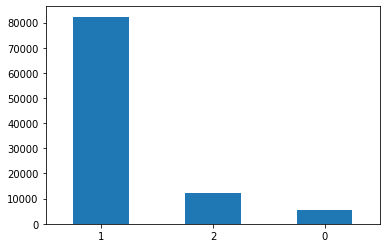

In [13]:
mapping = {0: "NEGATIVE",1: "POSITIVE",2:"NEUTRAL"}
def sentiment(label):
    return mapping[int(label)]
df.target = df.sentiment.apply(lambda x: sentiment(x))
count_classes = pd.value_counts(df['sentiment'], sort = True)
count_classes.plot(kind = 'bar', rot=0)

In [14]:
processedtext=np.array(df['TEXT'])
processedtext.shape

(100000,)

In [15]:
features=['Assigned Account','sentiment']
X=df[features].values

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df['TEXT'],df['sentiment'],test_size=0.30,random_state=10)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [18]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [19]:
print('Train Values')
print(X_train.shape)
print(y_train.shape)
print("------------------")
print("Test values")
print(X_test.shape)
print(y_test.shape)

Train Values
(70000, 500000)
(70000,)
------------------
Test values
(30000, 500000)
(30000,)


In [20]:
!pip install imbalanced-learn==0.7.0

     |████████████████████████████████| 167 kB 413 kB/s eta 0:00:01
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.0
    Uninstalling imbalanced-learn-0.8.0:
      Successfully uninstalled imbalanced-learn-0.8.0


In [21]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
nm=NearMiss()
# ros=RandomOverSampler()
# smt=SMOTETomek()
x_nm,y_nm=nm.fit_resample(X_train,y_train)
# x_ros,y_ros=ros.fit_sample(X_train,y_train)
# x_smt,y_smt=smt.fit_sample(X_train,y_train)

In [22]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_nm,y_nm)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

### IMBALANCED SCORES

In [23]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report
pred=LR.predict(X_test)
print("LogisticRegression:\n",metrics.classification_report(y_test,pred))

LogisticRegression:
               precision    recall  f1-score   support

           0       0.08      0.88      0.15      1687
           1       0.96      0.16      0.27     24711
           2       0.35      0.78      0.48      3602

    accuracy                           0.27     30000
   macro avg       0.47      0.61      0.30     30000
weighted avg       0.84      0.27      0.29     30000



In [24]:
df1=df

In [25]:
df1=df1.drop(['TEXT'],axis=1)
df1.head()

,Assigned Account,Email Address,sentiment,sentiment score
0,0,114,1,0.5267
1,0,114,1,0.2960
2,1,114,2,0.0000
3,1,114,0,-0.4019
4,1,114,2,0.0000


In [26]:
df['Assigned Account'].unique()

array([ 0,  1, 50, 21,  8, 32, 30, 19, 46, 29, 54, 52,  6, 35, 38, 11, 27,
       31, 15, 12, 45,  3, 51, 24, 40, 43, 47, 26, 56, 41, 23, 10,  5, 53,
       16,  9, 28, 48, 39, 14, 37, 25, 49,  4, 42, 55, 44, 34,  2,  7, 18,
       33, 22, 17, 36, 20, 13])

### BALANCED SCORES

In [27]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report
pred=LR.predict(x_nm)
print("LogisticRegression:\n",metrics.classification_report(y_nm,pred))

LogisticRegression:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94      3941
           1       0.93      0.99      0.96      3941
           2       0.96      0.92      0.94      3941

    accuracy                           0.95     11823
   macro avg       0.95      0.95      0.95     11823
weighted avg       0.95      0.95      0.95     11823



In [28]:
import xgboost
from xgboost import XGBClassifier
XGB=XGBClassifier()
XGB.fit(x_nm,y_nm)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:26:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
pred1=XGB.predict(x_nm)

In [30]:
print("XGBClassifier:\n",metrics.classification_report(y_nm,pred1))

XGBClassifier:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      3941
           1       1.00      1.00      1.00      3941
           2       0.97      0.99      0.98      3941

    accuracy                           0.99     11823
   macro avg       0.99      0.99      0.99     11823
weighted avg       0.99      0.99      0.99     11823

